# Measure the Difference between Preprint-Published similarity and Published Articles

This notebook is designed to answer the question how much do preprints change with each new version.
Based on results within my manuscript a review wanted to know the answer to the above question.
Also this notebook outputs an excel file that contains all preprint published pairs and their respective publication information.
Allows people to manually inspect practical consequences (if any) for preprints that take longer to publish.

In [1]:
from datetime import timedelta
import numpy as np
import pandas as pd
import plotnine as p9
from scipy.stats import linregress

# Load the Document Distances

In [2]:
published_date_distances = pd.read_csv(
    "output/preprint_published_distances.tsv", sep="\t"
)
for col in ["preprint_date", "published_date"]:
    published_date_distances[col] = pd.to_datetime(published_date_distances[col])
published_date_distances["time_to_published"] = pd.to_timedelta(
    published_date_distances["time_to_published"]
)
print(published_date_distances.shape)
published_date_distances.head()

(17527, 12)


,preprint_doi,document,category,version_count,published_doi,pmcid,pmcoa,journal,preprint_date,published_date,time_to_published,doc_distances
0,10.1101/000026,000026_v1.xml,genetics,1,10.1371/journal.pgen.1004412,PMC4125079,True,PLoS_Genet,2013-11-07,2014-08-07,273 days,1.360377
1,10.1101/000067,000067_v1.xml,genomics,1,10.1038/nature12904,PMC4285441,True,Nature,2013-11-07,2014-02-27,112 days,0.470905
2,10.1101/000109,000109_v1.xml,evolutionary biology,1,10.1371/journal.pgen.1004410,PMC4072524,True,PLoS_Genet,2013-11-07,2014-06-26,231 days,0.533702
3,10.1101/000141,000141_v1.xml,cancer biology,1,10.1371/journal.pcbi.1003433,PMC3894166,True,PLoS_Comput_Biol,2013-11-07,2014-01-16,70 days,0.646077
4,10.1101/000158,000158_v1.xml,bioinformatics,1,10.1186/1471-2164-15-398,PMC4041996,True,BMC_Genomics,2013-11-11,2014-05-24,194 days,0.959715


# Plot Version count against Doc Distances

Reviewer wanted to see if there is an association between version count and document distances. (i.e. if preprints with more versions have more text changes).

In [3]:
x = (published_date_distances["version_count"].values.tolist(),)
y = published_date_distances["doc_distances"].values.tolist()

results = linregress(x, y)
print(results)

LinregressResult(slope=0.02783807660743146, intercept=0.8682559699704958, rvalue=0.036182858852563456, pvalue=nan, stderr=nan, intercept_stderr=nan)


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in sqrt


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/version_count_doc_distances.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/version_count_doc_distances.png


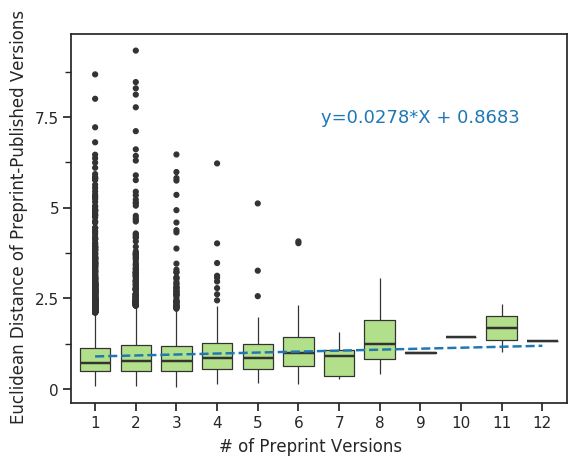

<ggplot: (-9223363252510507881)>


In [4]:
published_date_distances["version_count"] = pd.Categorical(
    published_date_distances["version_count"].tolist()
)
g = (
    p9.ggplot(published_date_distances, p9.aes(x="version_count", y="doc_distances"))
    + p9.geom_boxplot(fill="#b2df8a")
    + p9.geom_line(
        data=pd.DataFrame(
            dict(
                version_count=np.arange(1, 13),
                doc_distances=np.arange(1, 13) * 0.02669 + 0.8697,
            )
        ),
        linetype="dashed",
        color="#1f78b4",
        size=1,
    )
    + p9.annotate(
        "text",
        label=f"y={results.slope:0.4f}*X + {results.intercept:0.4f}",
        x=9,
        y=7.5,
        size=13,
        color="#1f78b4",
    )
    + p9.labs(
        x="# of Preprint Versions",
        y="Euclidean Distance of Preprint-Published Versions",
    )
    + p9.theme_seaborn(style="white", context="notebook")
)
g.save("output/version_count_doc_distances.svg")
g.save("output/version_count_doc_distances.png", dpi=600)
print(g)

Overall, preprints change with each new version; however, based on the magnitude of the slope I'd argue that these changes are minor compared to substantial changes (~6 distance units)

# Output published dates to Excel

Reviewer asked if manually pursuing preprints that take longer to publish would produce any interesting results. Great question, but not enough time to go into that; however, providing a supplementary file for others to look into could provide an in depth answer.

In [5]:
excel_print_df = published_date_distances.drop(
    ["document", "category", "pmcoa"], axis=1
).rename(
    index=str,
    columns={
        "preprint_date": "posted_date",
        "time_to_published": "days_till_published",
        "doc_distances": "preprint_published_distance",
    },
)[
    [
        "preprint_doi",
        "posted_date",
        "pmcid",
        "published_doi",
        "journal",
        "published_date",
        "days_till_published",
        "preprint_published_distance",
        "version_count",
    ]
]
excel_print_df

,preprint_doi,posted_date,pmcid,published_doi,journal,published_date,days_till_published,preprint_published_distance,version_count
0,10.1101/000026,2013-11-07,PMC4125079,10.1371/journal.pgen.1004412,PLoS_Genet,2014-08-07,273 days,1.360377,1
1,10.1101/000067,2013-11-07,PMC4285441,10.1038/nature12904,Nature,2014-02-27,112 days,0.470905,1
2,10.1101/000109,2013-11-07,PMC4072524,10.1371/journal.pgen.1004410,PLoS_Genet,2014-06-26,231 days,0.533702,1
3,10.1101/000141,2013-11-07,PMC3894166,10.1371/journal.pcbi.1003433,PLoS_Comput_Biol,2014-01-16,70 days,0.646077,1
4,10.1101/000158,2013-11-11,PMC4041996,10.1186/1471-2164-15-398,BMC_Genomics,2014-05-24,194 days,0.959715,1
...,...,...,...,...,...,...,...,...,...
17522,10.1101/858100,2019-11-29,PMC6932971,10.3389/fnsyn.2019.00035,Front_Synaptic_Neurosci,2019-12-20,21 days,0.916104,2
17523,10.1101/862847,2019-12-03,PMC6933653,10.1186/s12864-019-6379-5,BMC_Genomics,2019-12-26,23 days,0.478213,1
17524,10.1101/867903,2019-12-06,PMC6927177,10.1186/s13059-019-1915-9,Genome_Biol,2019-12-23,17 days,0.580229,1
17525,10.1101/2019.12.13.875427,2019-12-13,PMC6934696,10.1038/s41598-019-56587-5,Sci_Rep,2019-12-27,14 days,2.415845,1


In [6]:
excel_print_df = excel_print_df[excel_print_df["days_till_published"] > pd.Timedelta(0)]
excel_print_df["posted_date"] = excel_print_df.posted_date.dt.date
excel_print_df["published_date"] = excel_print_df.published_date.dt.date

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
(
    excel_print_df.sort_values("days_till_published", ascending=False).to_excel(
        "output/published_preprints_information.xlsx", engine="xlsxwriter"
    )
)